In [239]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Условие 1: Задача 1
Постройте график
Назовите график
Сделайте именование оси x и оси y
Сделайте выводы

In [240]:
df = pd.read_csv('.\houses.csv', encoding='1251')
df.sample(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
11797,4039300140,20140625T000000,530000.0,5,2.25,2140,7910,1.0,0,0,...,7,1070,1070,1962,0,98007,47.6071,-122.137,1680,8700
20953,9578500180,20150121T000000,427000.0,3,2.50,3192,5653,2.0,0,0,...,8,3192,0,2014,0,98023,47.2956,-122.350,3000,5134
9253,853600150,20140524T000000,1680000.0,4,4.25,5584,68257,2.0,0,0,...,11,5584,0,1998,0,98014,47.6113,-121.952,5030,101901
16936,1761600050,20141231T000000,397000.0,3,2.00,1100,9165,1.0,0,0,...,7,1100,0,1969,0,98034,47.7304,-122.231,1510,8500
20059,8032700110,20150409T000000,650000.0,3,2.50,1480,2159,3.0,0,0,...,8,1480,0,2007,0,98103,47.6533,-122.341,1480,1554


## 1.2 Изучите стоимости недвижимости

In [241]:
price_values = df['price'].value_counts().reset_index()
price_values


,price,count
0,350000.0,172
1,450000.0,172
2,550000.0,159
3,500000.0,152
4,425000.0,150
...,...,...
4023,607010.0,1
4024,1362500.0,1
4025,298800.0,1
4026,957500.0,1


Text(0, 0.5, 'Частота')

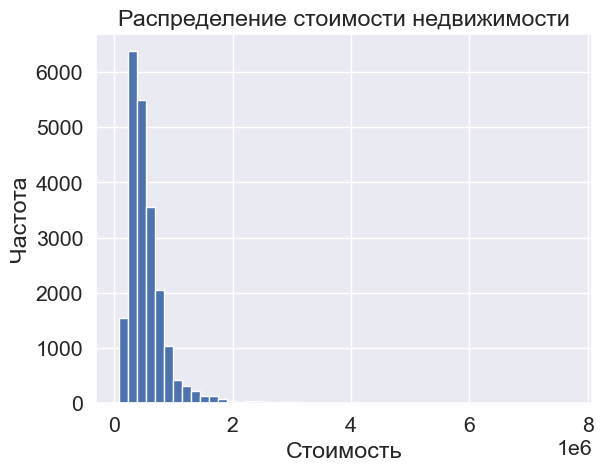

In [242]:
df['price'].hist(bins=50)
plt.title('Распределение стоимости недвижимости')
plt.xlabel('Стоимость')
plt.ylabel('Частота')

## 1.3 Изучите распределение квадратуры жилой площади

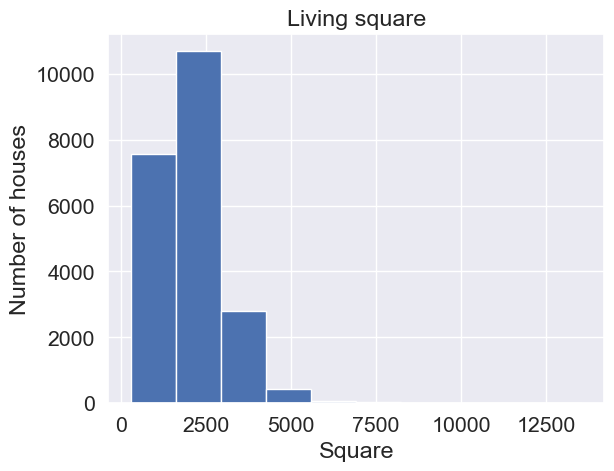

In [243]:
plt.title('Living square')
plt.xlabel('Square')
plt.ylabel('Number of houses')
plt.hist(df['sqft_living']);



## 2.1.4 Изучите распределение года постройки

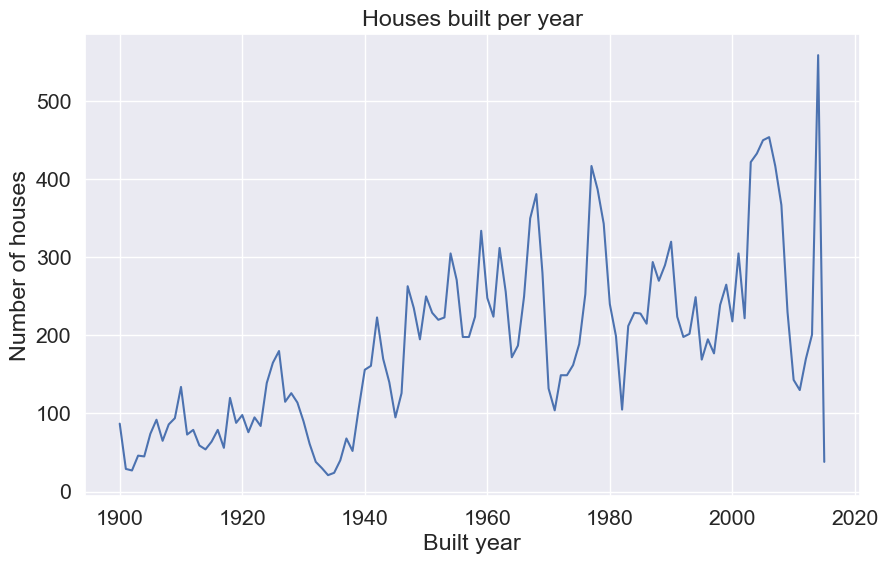

In [244]:
data = df.groupby('yr_built')['id'].agg(count='count').reset_index()
data['yr_built'].astype('object')
plt.figure(figsize=(10,6))
plt.title('Houses built per year')
plt.xlabel('Built year')
plt.ylabel('Number of houses')
plt.plot(data['yr_built'], data['count']);

## 2.1 Изучите распределение домов от наличия вида на набережную
Постройте график
Сделайте выводы

Выводы: значительное преобладание домов без вида на набережную


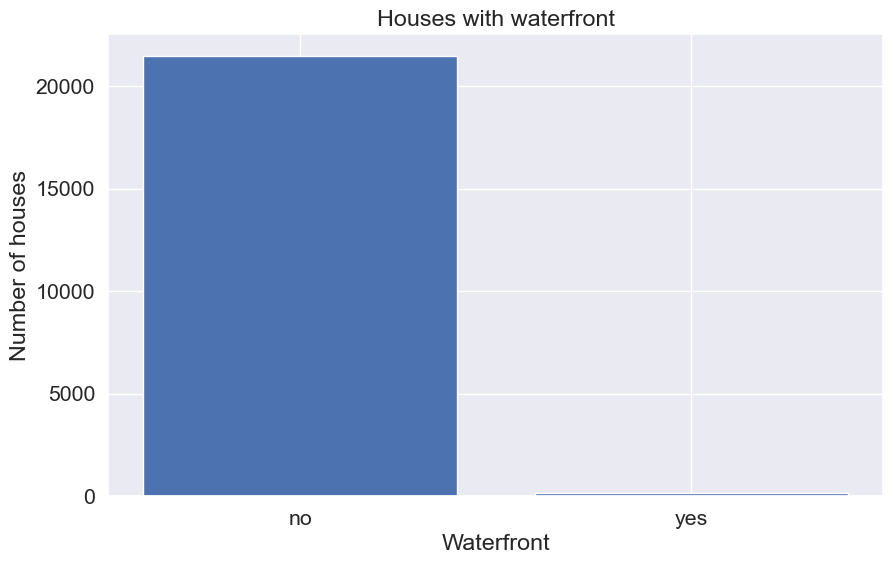

In [245]:
waterfront = df.groupby(df['waterfront'])['id'].agg(count='count').reset_index()
waterfront['waterfront'] = waterfront['waterfront'].astype('object')
waterfront.replace({0: 'no', 1: 'yes'}, inplace= True)
plt.figure(figsize=(10,6))
plt.title('Houses with waterfront')
plt.xlabel('Waterfront')
plt.ylabel('Number of houses')
plt.bar(waterfront['waterfront'],waterfront['count'])

print('Выводы: значительное преобладание домов без вида на набережную')

## 2.2 Изучите распределение этажей домов

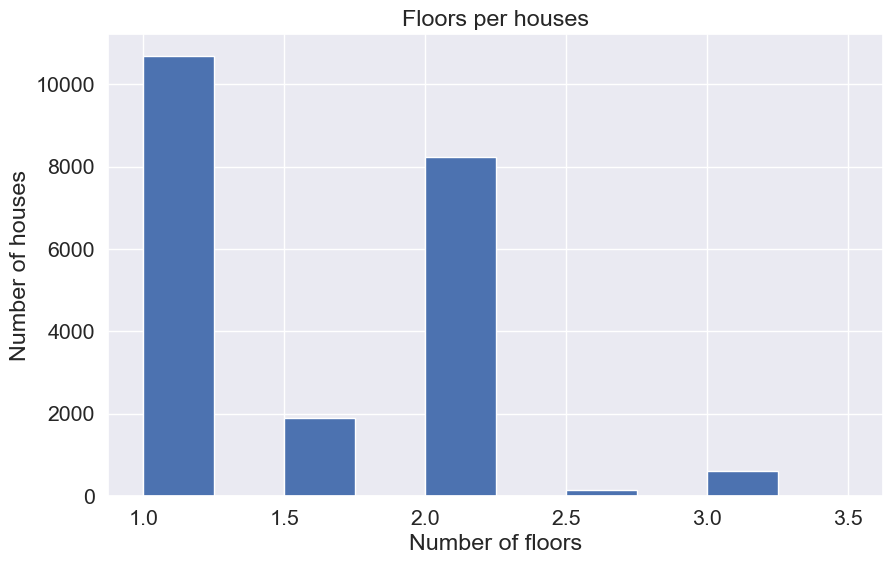

In [246]:
plt.figure(figsize=(10,6))
plt.title('Floors per houses')
plt.xlabel('Number of floors')
plt.ylabel('Number of houses')
plt.hist(df['floors']);


## 2.2 Изучите распределение состояния домов

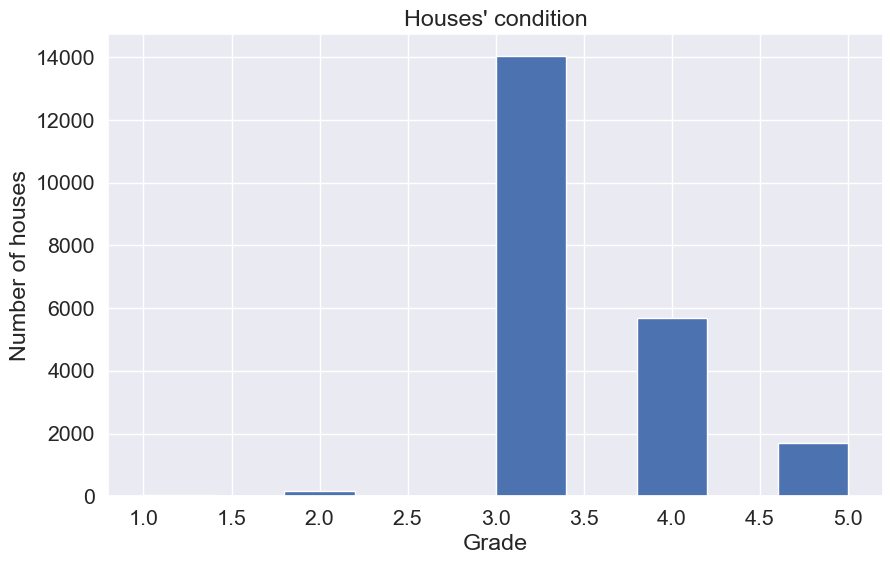

In [247]:
plt.figure(figsize=(10,6))
plt.title('Houses\' condition')
plt.xlabel('Grade')
plt.ylabel('Number of houses')
plt.hist(df['condition']);

## Условие 3: 3 задача
Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.
Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.


## Part 1

In [248]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_df.corr()
corr_matrix = np.round(corr_matrix, 1)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0
corr_matrix.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
price,0.0,1.0,0.3,0.5,0.7,0.0,0.3,0.3,0.4,0.0,0.7,0.6,0.3,0.0,0.0,0.0,0.3,0.0,0.6,0.0
bedrooms,0.0,0.3,1.0,0.5,0.6,0.0,0.0,0.0,0.0,0.0,0.4,0.5,0.3,0.0,0.0,0.0,0.0,0.0,0.4,0.0
bathrooms,0.0,0.5,0.5,1.0,0.8,0.0,0.5,0.0,0.0,0.0,0.7,0.7,0.3,0.5,0.0,0.0,0.0,0.0,0.6,0.0
sqft_living,0.0,0.7,0.6,0.8,1.0,0.0,0.4,0.0,0.3,0.0,0.8,0.9,0.4,0.3,0.0,0.0,0.0,0.0,0.8,0.0


Выводы: в соответствии с построенной матрицой корреляции можно выявить следующие характеристики, влияющие на цену недвижимости: 
1. Количество ванных комнат
2. Жилая площадь
3. Состояние недвижимости
4. Площадь недвижимости (кроме фундамента)
5. Площадь после реновации 2015 года
Помимо очевидной взаимосвязи общей площади с площадью отдельных секций недвижимости, стоит обратить внимание на оставшиеся характеристики (1, 3)
Построим тепловую карту корреляции для визуализации получившихся данных

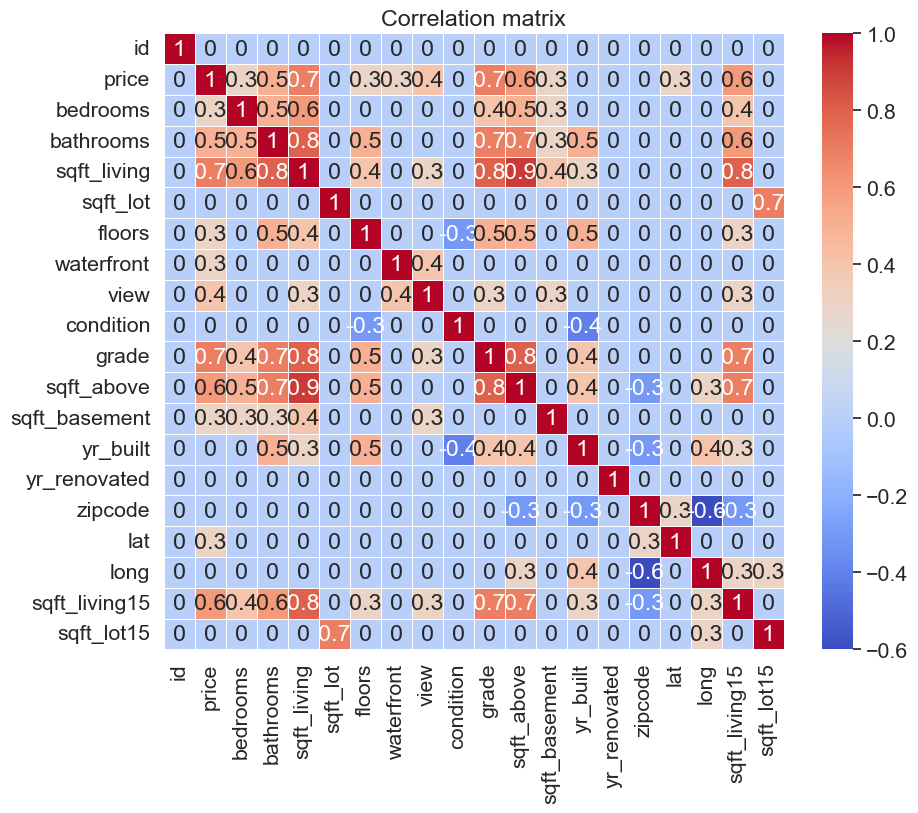

In [249]:
plt.figure(figsize=(10, 8))

sns.set(font_scale=1.4)

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Correlation matrix');

В меньшей степени на стоимость жилища влияют:
1. Кол-во спален и этажей
2. Вид и вид на набережную
3. Широта и долгота (география местности)
4. Площадь основания недвижимости
Вероятно, дома расположены на однотипной местности, равноудаленно от географических достопримечательнойстей, туристических и деловых районов, что обуславливает вклад общего состояния жилого помещения в общую стоимость жилья.
Визуализируем взаимосвязи отдельных характеристик на цену недвижимости

## Part 2

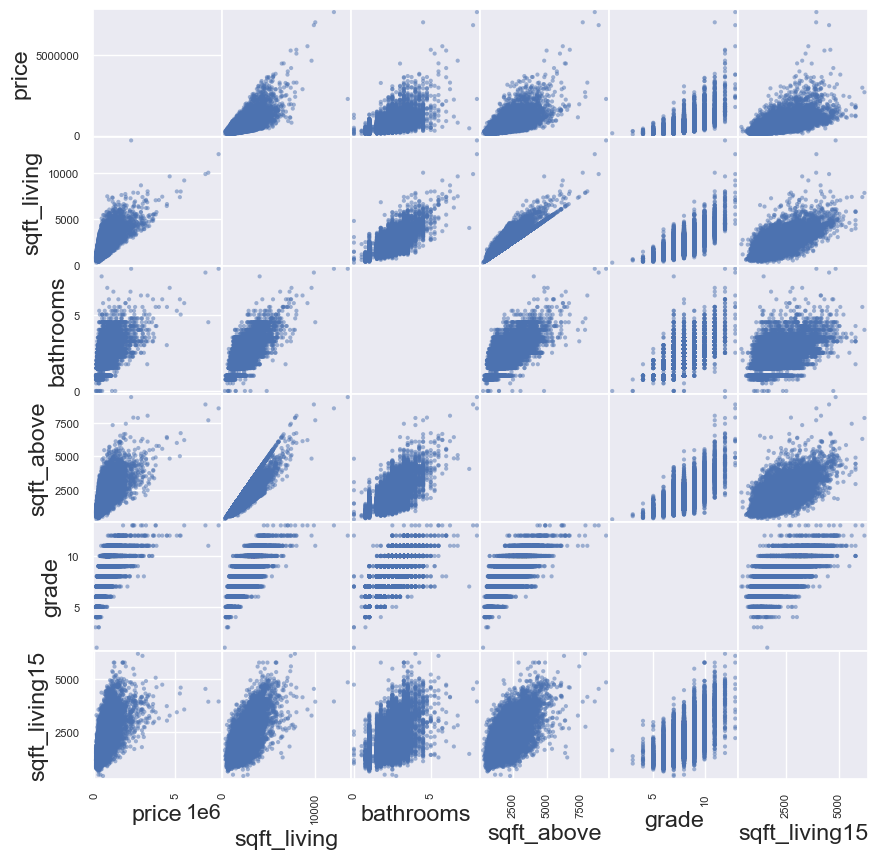

In [250]:
pd.plotting.scatter_matrix(df[['price', 'sqft_living', 'bathrooms', 'sqft_above', 'grade', 'sqft_living15']], 
                           figsize=(10, 10), diagonal='');

Рассмотрим соответствующие граффики отдельно

### Корреляция между ценой недвижимости и жилой площадью

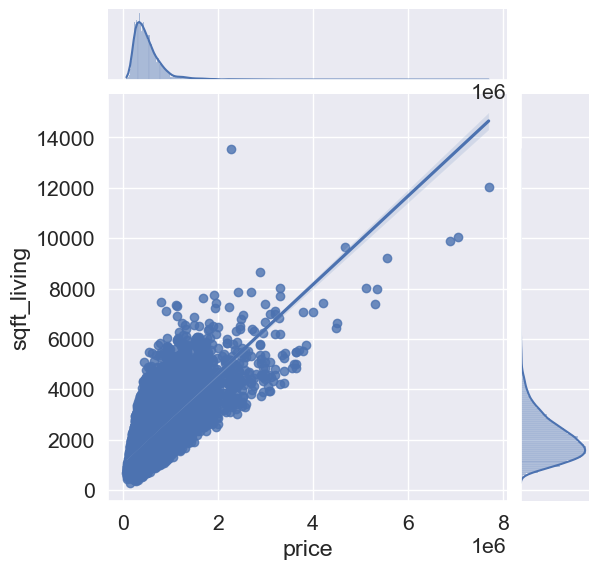

In [251]:
sns.jointplot(x=df['price'], y=df['sqft_living'], kind='reg');

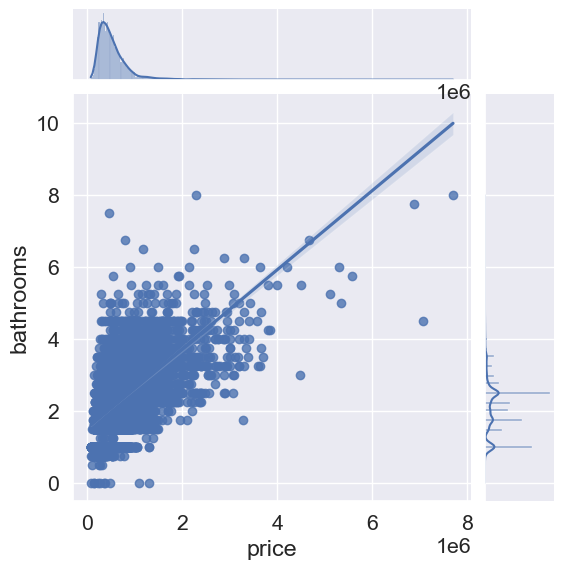

In [252]:
sns.jointplot(x=df['price'], y=df['bathrooms'], kind='reg');

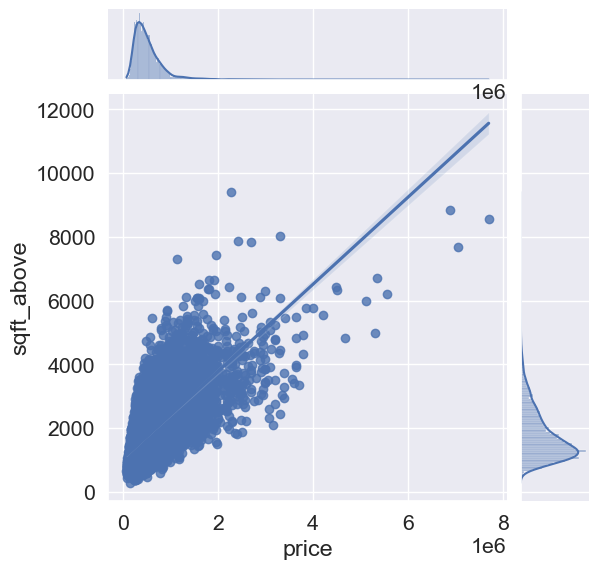

In [253]:
sns.jointplot(x=df['price'], y=df['sqft_above'], kind='reg');

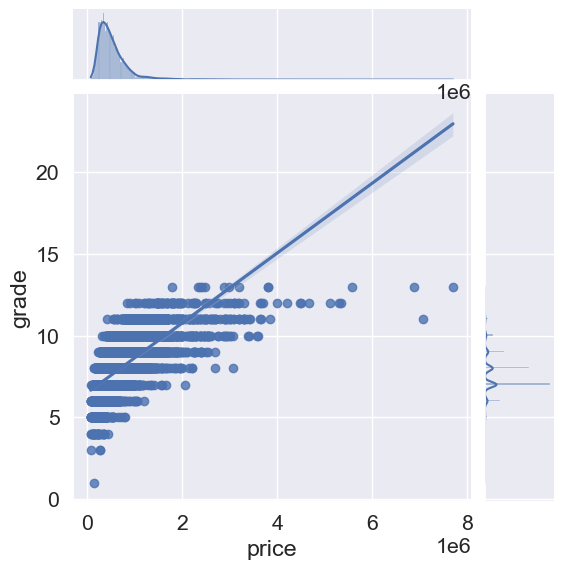

In [254]:
sns.jointplot(x=df['price'], y=df['grade'], kind='reg');

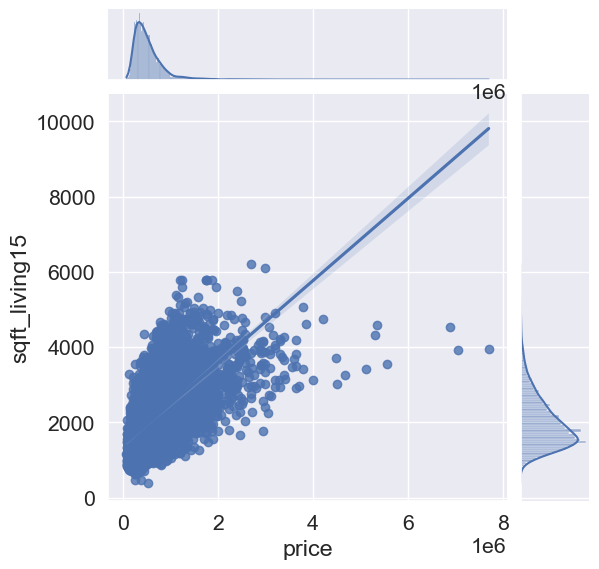

In [255]:
sns.jointplot(x=df['price'], y=df['sqft_living15'], kind='reg');

Отдельные графики демонстрируют положительную корреляционную связь влияния характеристик на стоимость жилья.

<BarContainer object of 5 artists>

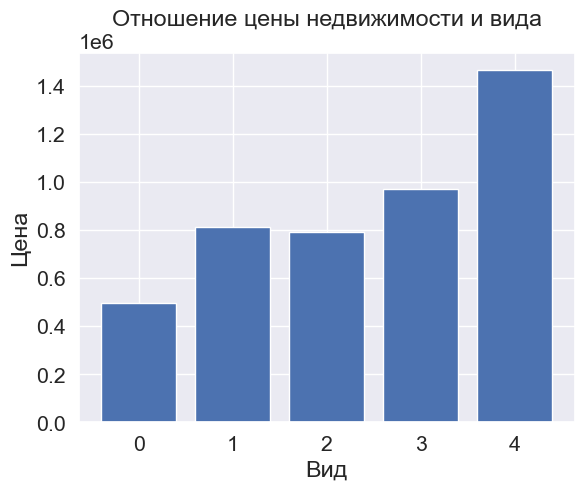

In [256]:
new_df = df.groupby('view')['price'].mean().reset_index()
plt.title('Отношение цены недвижимости и вида')
plt.xlabel('Вид')
plt.ylabel('Цена')
plt.bar(new_df['view'], new_df['price'])

Вывод: средняя цена недвижимости выше при наличии хорошего вида(слабо-положительная корреляционная связь 0,3)

Анализ данных выявил влияние отдельных характеристик недвижимости на его стоимость. Выраженное влияние на цену жилья оказывает его состояние и общая площадь (КС = 0,7). В меньшей степени стоимость обусловлена площадью жилья без фундамента (КС = 0,6), количеством ванных комнат и видом.